There are many different algorithms provided by Qiskit. Minimum eigensolvers, time evolvers, and amplitude estimators. The full set of categories can be seen in Qiskit's algorithm documentation. 

In this notebook we'll study the VQE, the Variational Quantum Eigensolver, which takes a trial wave function, in the form of a QuantumCircuit, and a classical optimizer among other things. 

Let's take a look at an example to construct a VQE instance. Here TwoLocal is the variational form (trial wave function), a parameterized circuit which can be varied. And SLSQP is a classical optimizer. 

In [5]:
from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal

num_qubits = 2
ansatz = TwoLocal(num_qubits, 'ry', 'cz')
optimizer = SLSQP(maxiter = 1000)

Let's draw the ansatz so we can see it's a QuantumCircuit where theta[0] through theta[7] are the parameters that will be varied by the VQE to find the minimum eigenvalue. 

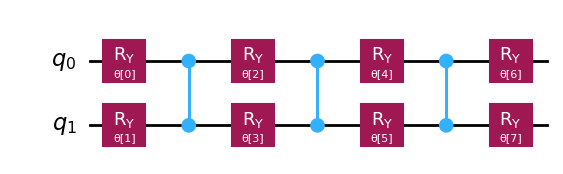

In [9]:
ansatz.decompose().draw('mpl')

### Running the algorithm


Algorithms rely on the primitives to evaluate expectation values or sample circuits. The primitives can be based on a simulator or real device and can be used interchangeably in the algorithm, as they all implement the same interface. 

In the VQE, we evaluate expectation values, so we use the `qiskit.primtives.Estimator` primitive. 

In [13]:
from qiskit.primitives import Estimator

estimator = Estimator()

This estimator uses an exact statevector simulation to evaluate teh expectation values. We can also use a shot-based or noisy simulators or real backend instead. 

Let's now instantiate the VQE

In [15]:
from qiskit_algorithms.minimum_eigensolvers import VQE

vqe = VQE(estimator, ansatz, optimizer)

## Complete Working Example

VQE will find the minimum eigenvalue (minimum energy value of hamiltonian) and hence we need such an operator for VQE to work with. Such an operator is given below. This was originally created by the Nature application module as the Hamiltonian for an H2 molecule at 0.735A interatomic distance. It is a sum of Pauli terms below. 

In [19]:
from qiskit.quantum_info import SparsePauliOp, Operator

H2_op = SparsePauliOp.from_list([
    ("II", -1.052373245772859),
    ("IZ", 0.39793742484318045),
    ("ZI", -0.39793742484318045),
    ("ZZ", -0.01128010425623538),
    ("XX", 0.18093119978423156)
])

Now let's run the VQE and print the result object it returns

In [20]:
result = vqe.compute_minimum_eigenvalue(H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 121,
    'eigenvalue': -1.8572748731959305,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x2aa95e900>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): -1.3224336599427673,
                              ParameterVectorElement(θ[1]): -6.806089835497214,
                              ParameterVectorElement(θ[4]): -4.935566265802771,
                              ParameterVectorElement(θ[2]): -0.8946270849257044,
                              ParameterVectorElement(θ[3]): 2.0940136252885053,
                              ParameterVectorElement(θ[5]): -4.058555539770799,
                              ParameterVectorElement(θ[6]): -1.4077839943569097,
                              ParameterVectorElement(θ[7]): 5.25420519504224},
    'optimal_point': array([-1.32243366, -6.80608984, -0.89462708,  2.09401363, -4.93556627,
       -4.05855554, -1.40778399,  5.2542052 ]),
    'optima

After 121 iterations of trying to minimize the cost function, it found a minimum eigenvalue of $\approx-1.85727$, which is the electronic ground state of the given H2 molecule. The optimal parameters of the ansatz can also be seen which are the values that were in the ansatz at the minimum value. 

## Updating Primitive Inside the VQE

Let's change the estimator inside the VQE. 

In this example we are changing to a shot-based estimator, not an exact simulation. for noisy-loss functions, the SPSA optimizer typically performs well, so we also update the optimizer. 

In [36]:
from  qiskit_algorithms.optimizers import SPSA

estimator = Estimator(options = {'shots': 1000})

vqe.estimator = estimator 
vqe.optimizer = SPSA(maxiter = 100)

result = vqe.compute_minimum_eigenvalue(operator = H2_op)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 200,
    'eigenvalue': -1.857123791775244,
    'optimal_circuit': <qiskit.circuit.library.n_local.two_local.TwoLocal object at 0x2ab497fe0>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): -1.2426721802495542,
                              ParameterVectorElement(θ[1]): 0.6174632396162294,
                              ParameterVectorElement(θ[4]): -0.9863428463249295,
                              ParameterVectorElement(θ[2]): -5.408099003978535,
                              ParameterVectorElement(θ[3]): -2.6968289211061265,
                              ParameterVectorElement(θ[5]): -7.153529665104122,
                              ParameterVectorElement(θ[6]): -3.5318279868260065,
                              ParameterVectorElement(θ[7]): 3.0840662808922277},
    'optimal_point': array([-1.24267218,  0.61746324, -5.408099  , -2.69682892, -0.98634285,
       -7.15352967, -3.53182799,  3.08406628]),
    'opti